Start by importing some packages we will be using for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid") # Changes the background colour for all graphs, when we call sns.

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

#### Import my data

In [2]:
supermarket_data = pd.read_csv('C:/Users/HP/Desktop/train.txt')

In [3]:
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [6]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [7]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

<br>

## C* Alternatively
<a style="color:steelblue;">
We can just call `info()` this will print the dtype as well as summary of values and whether a column contains null values.
</a>

In [8]:
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


<br>

In [9]:
supermarket_data.head(2)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69


In [10]:
#Remove Id columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

newdata = supermarket_data.drop(cols_2_remove, axis=1)

In [11]:
newdata.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [12]:
newdata.shape

(4990, 10)

## C* Alternative: for Loop Statement in case you have to deal with larger datasets

In [13]:
## Categorical Variables: 
# All variables that have been assigned to finite values, those values could be `Ordered` or `Unordered`.

CAT_cols = []  ## Empty List, acts as placeholder for our results
for i in newdata.columns: ## Loop through every column in the data
    if newdata[i].dtypes == object and newdata[i].nunique() <= 20:  ## condition
        CAT_cols.append(i)  ##Append result to our placeholder
        
print('Categorical Variables:\n {}\n\n' .format(CAT_cols)) ## Voila!


## Numerical Variables:
# This consist of numbers, presented in a finite and determinable fashion e.g 'Supermarket_Opening_Year' 
# or infinite and continuous fashion  e.g 'Product_Shelf_Visibility'

NUM_cols = []
for i in newdata.columns:
    if newdata[i].dtypes != object and newdata[i].nunique() > 5:
        NUM_cols.append(i)
        
print('Numerical Variables:\n {}\n\n' .format(NUM_cols))

Categorical Variables:
 ['Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type']


Numerical Variables:
 ['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']




In [14]:
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

## DATA VISUALIZATION
### BAR PLOT

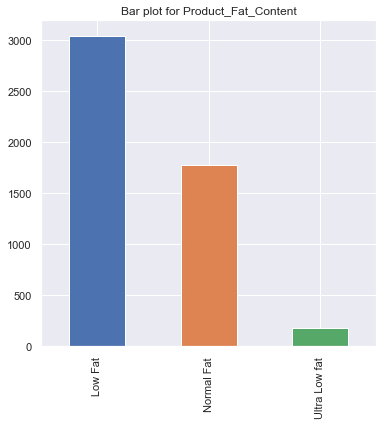

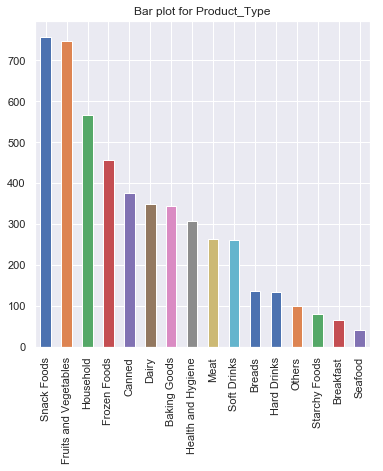

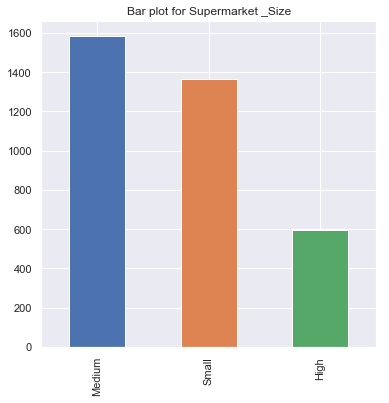

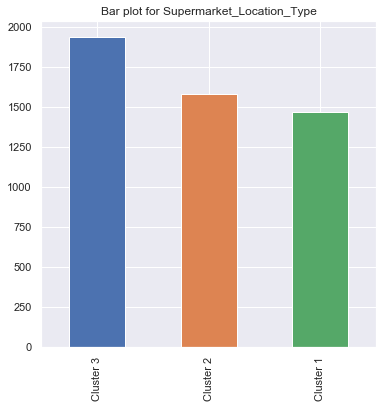

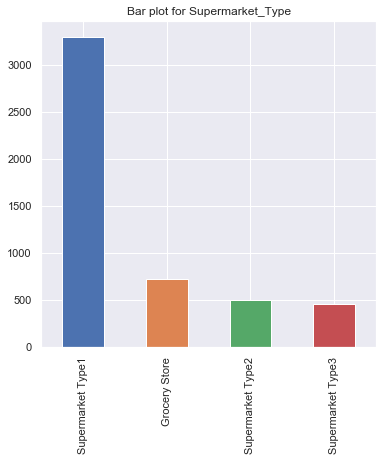

In [15]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = newdata[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)



In [16]:
# plt.savefig("../SuperMarketBarPlot.png") 

# Scatter plot for Numerical Features

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

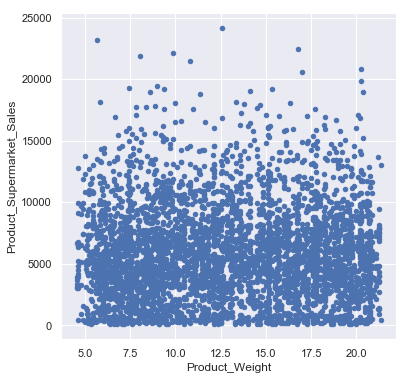

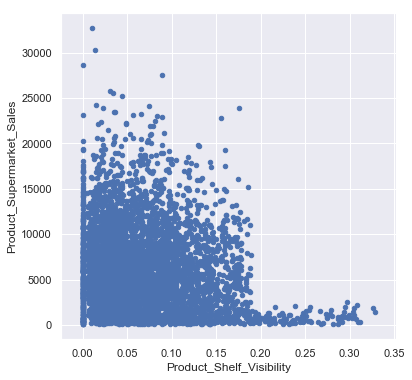

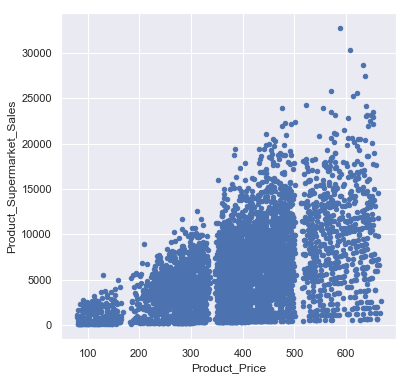

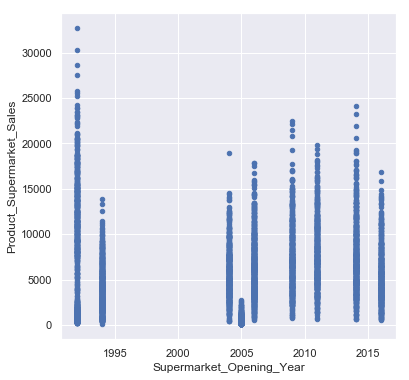

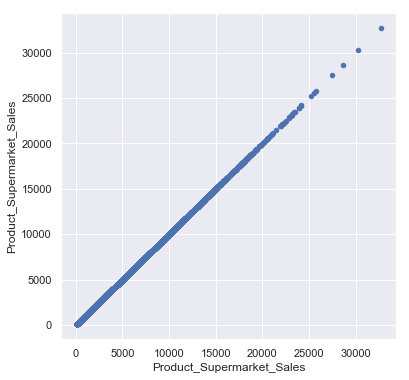

In [17]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    newdata.plot.scatter(x = col, y = 'Product_Supermarket_Sales', ax = ax)


<br>

## C* Alternate Plot for Above Scatter Plot

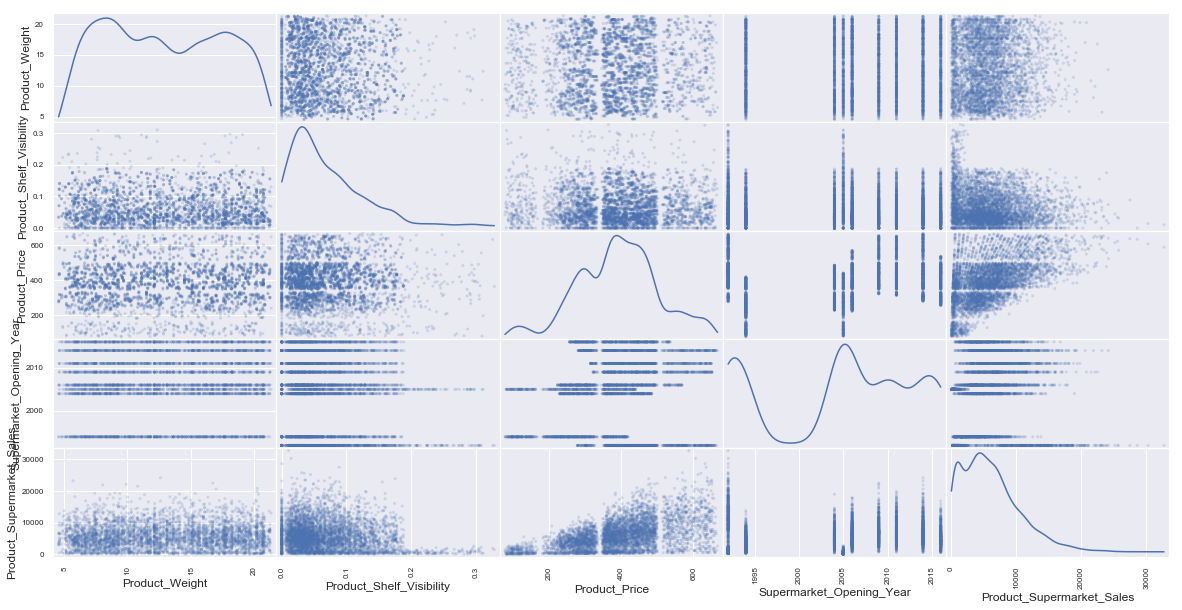

In [18]:
numDf = newdata[num_cols]

from pandas.plotting import scatter_matrix

scatter_matrix(numDf, diagonal='kde', figsize = (20, 10), alpha=0.2) 
# diagonal in naturally, set to histogram, changed it to k-density for the sake of comparing with the graph above.
plt.show()

In [19]:
# plt.savefig("../SuperMarketScatterPlot.png") 

### BOX PLOTS OF CATEGORICAL COLUMNS AGAINST TARGET COLUMN

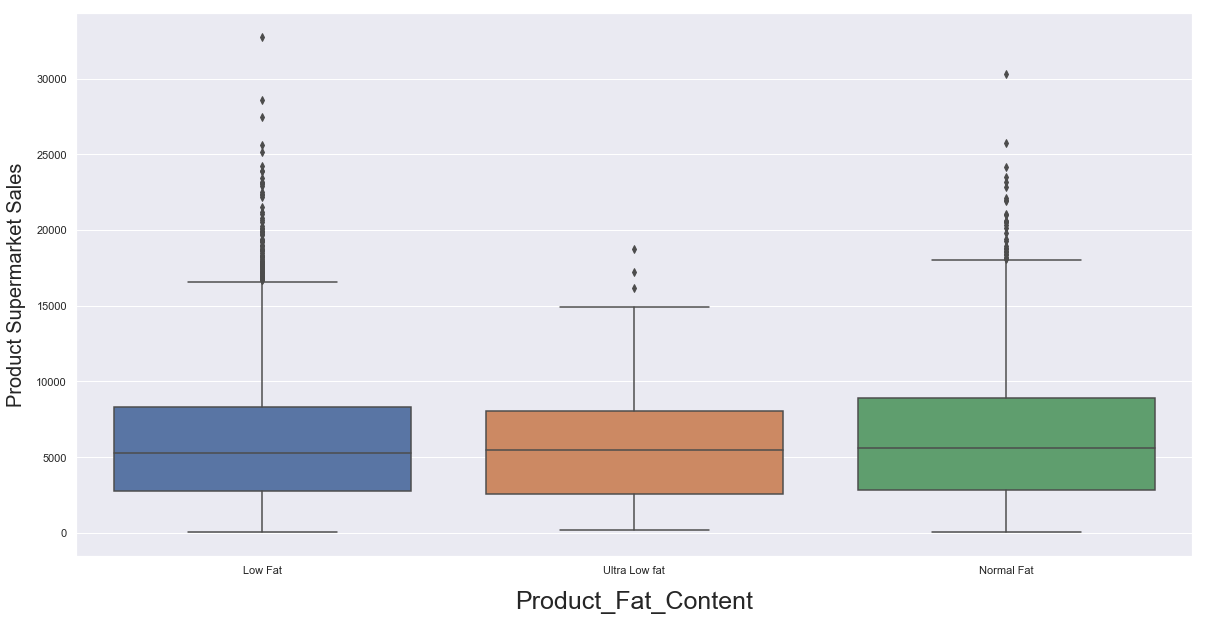

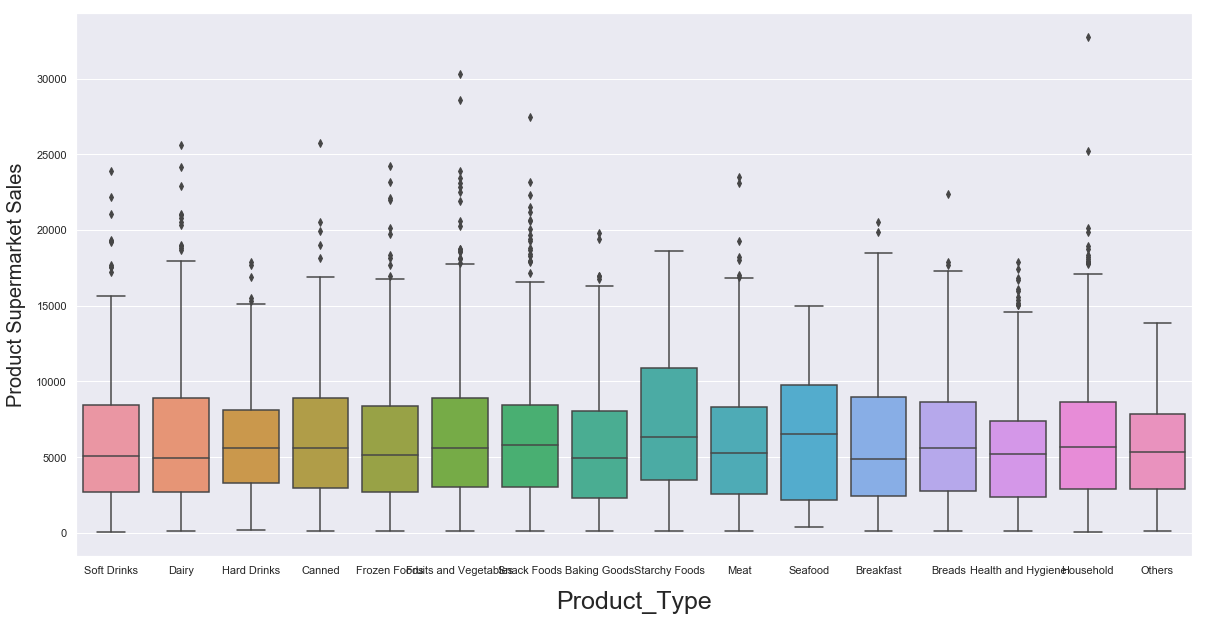

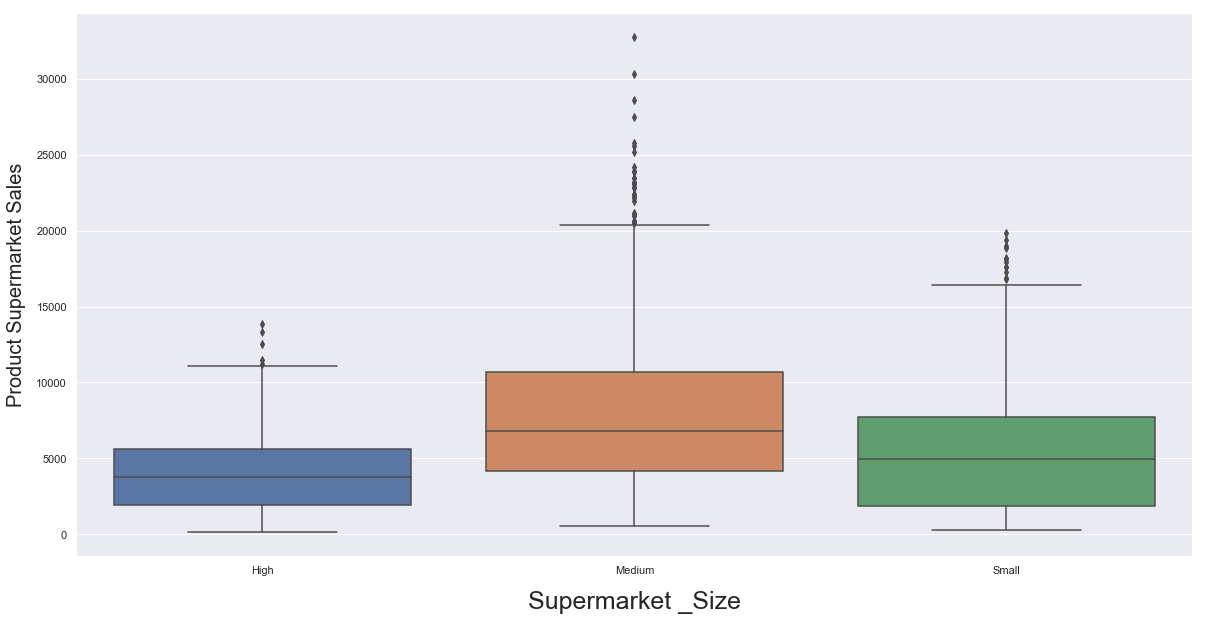

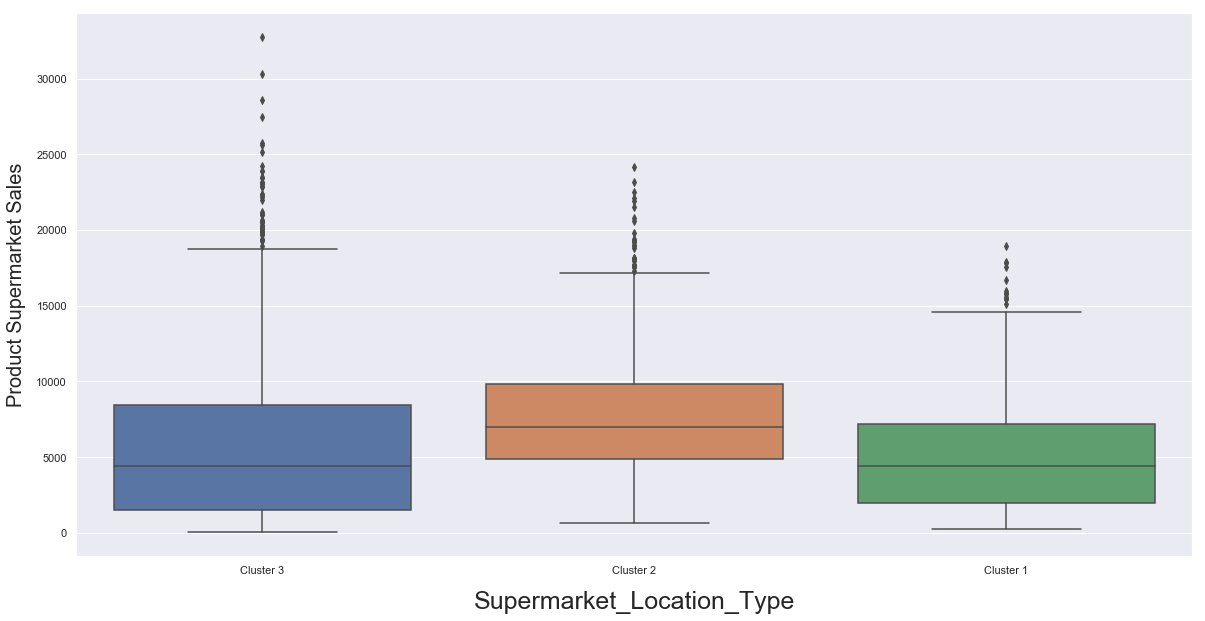

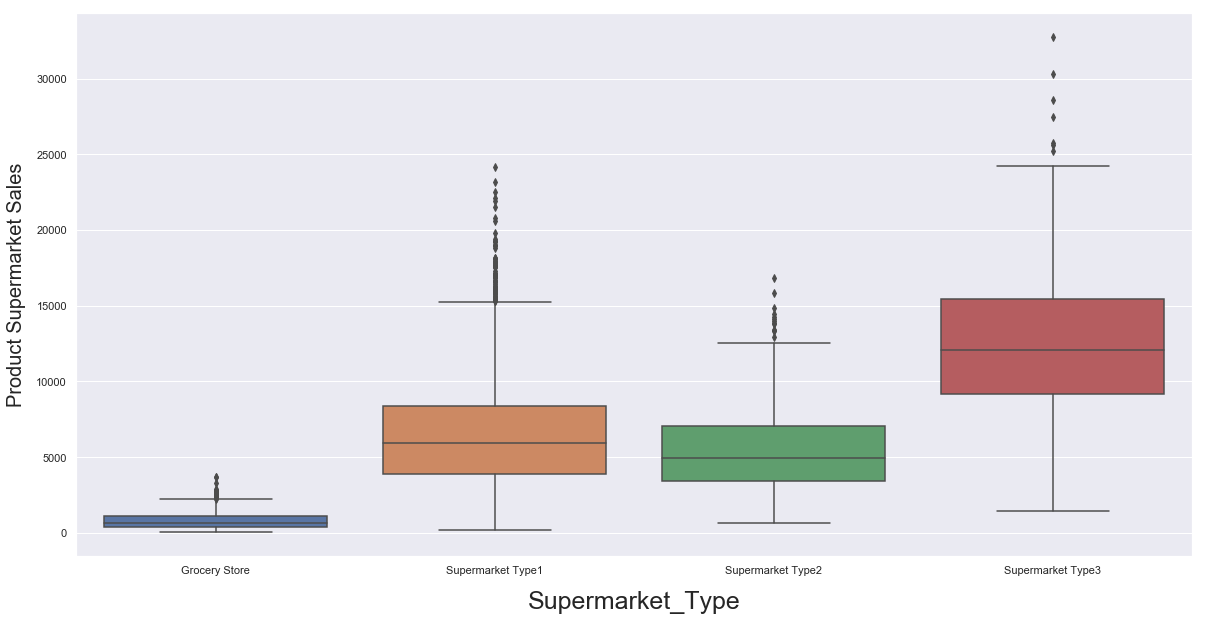

In [21]:
for col in cat_cols:
    fig = plt.subplots(figsize=(20, 10))
    sns.boxplot(col, 'Product_Supermarket_Sales', data=newdata)
    plt.xlabel(col, size =25, labelpad = 15) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales', size = 20, labelpad = 10)# Set text for y axis
    plt.show()
    

  

### MORE VISUALIZATION

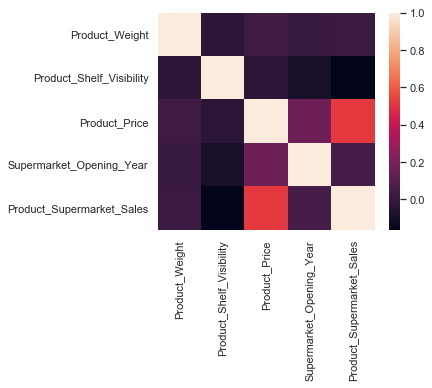

In [22]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = newdata.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

<br>

## C* Dropping upper Triangle in the HeatMap

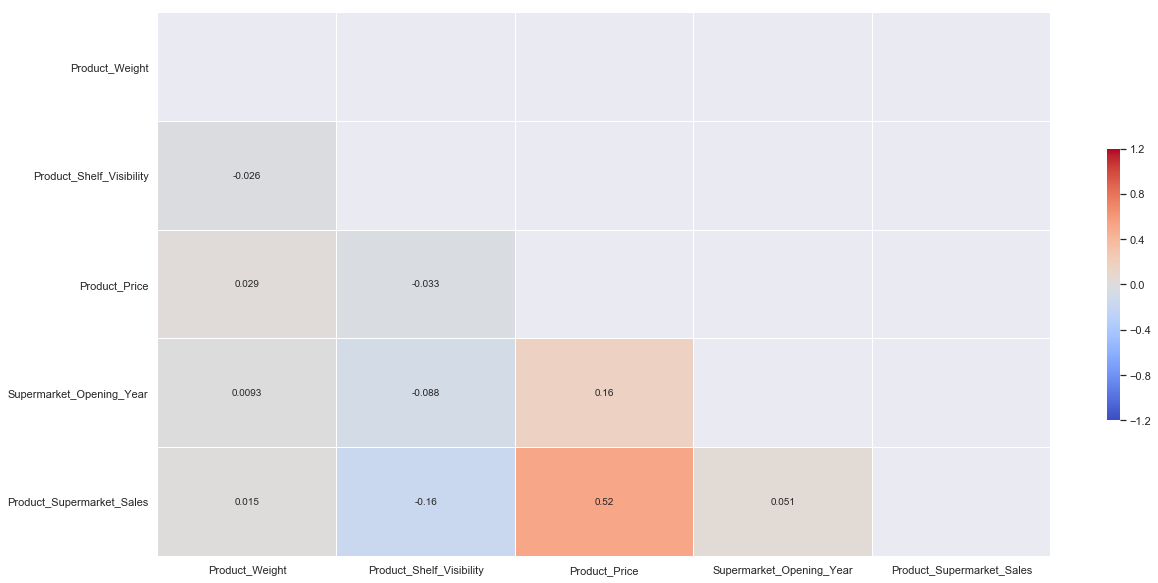

In [23]:
corrmat = newdata.corr()

mask = np.zeros_like(corrmat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20, 10))

sns.heatmap(corrmat, mask =mask, center = 0, square = False, 
            vmin = -1.2, vmax = 1.2, cbar_kws = {"shrink": .5}, 
            cmap = "coolwarm", linewidths = .1, annot = True)
plt.show()

In [24]:
#  plt.savefig("../SuperMarketHeatMap.png") 

<br>

## C* Handling Missing Values

In [25]:
# Function to display Missing Value
def display_missing(df):
    for col in df.columns.tolist():
        if df[col].isnull().any(): # Otherwise add '== False' to show non-missing values
            print('{} \n columns missing values: {}\n'.format(col, df[col].isnull().sum()))

In [26]:
display_missing(newdata)

Product_Weight 
 columns missing values: 802

Supermarket _Size 
 columns missing values: 1450



In [27]:
# To call Non-Missing values
## CATEGORICAL features

CAT_cols_pair = []
for i in CAT_cols:
    if newdata[i].isnull().any() == False:
        CAT_cols_pair.append(i)
        
print(CAT_cols_pair, '\n') #'\n' = next line


## Total features

COLS_2_pair = []
for i in newdata.columns:
    if newdata[i].isnull().any() == False:
        COLS_2_pair.append(i)
    
print(COLS_2_pair)

['Product_Fat_Content', 'Product_Type', 'Supermarket_Location_Type', 'Supermarket_Type'] 

['Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type', 'Product_Price', 'Supermarket_Opening_Year', 'Supermarket_Location_Type', 'Supermarket_Type', 'Product_Supermarket_Sales']


<br>

### PAIR PLOT OF COLUMNS WITHOUT MISSING VALUES

<Figure size 432x288 with 0 Axes>

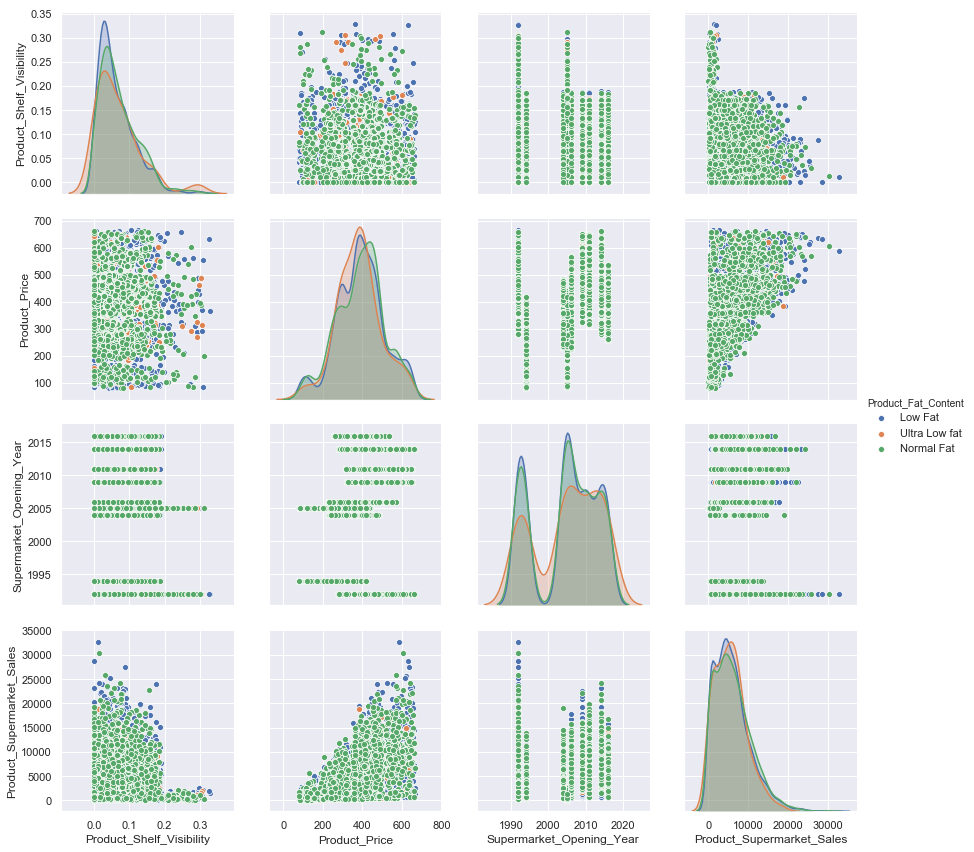

<Figure size 432x288 with 0 Axes>

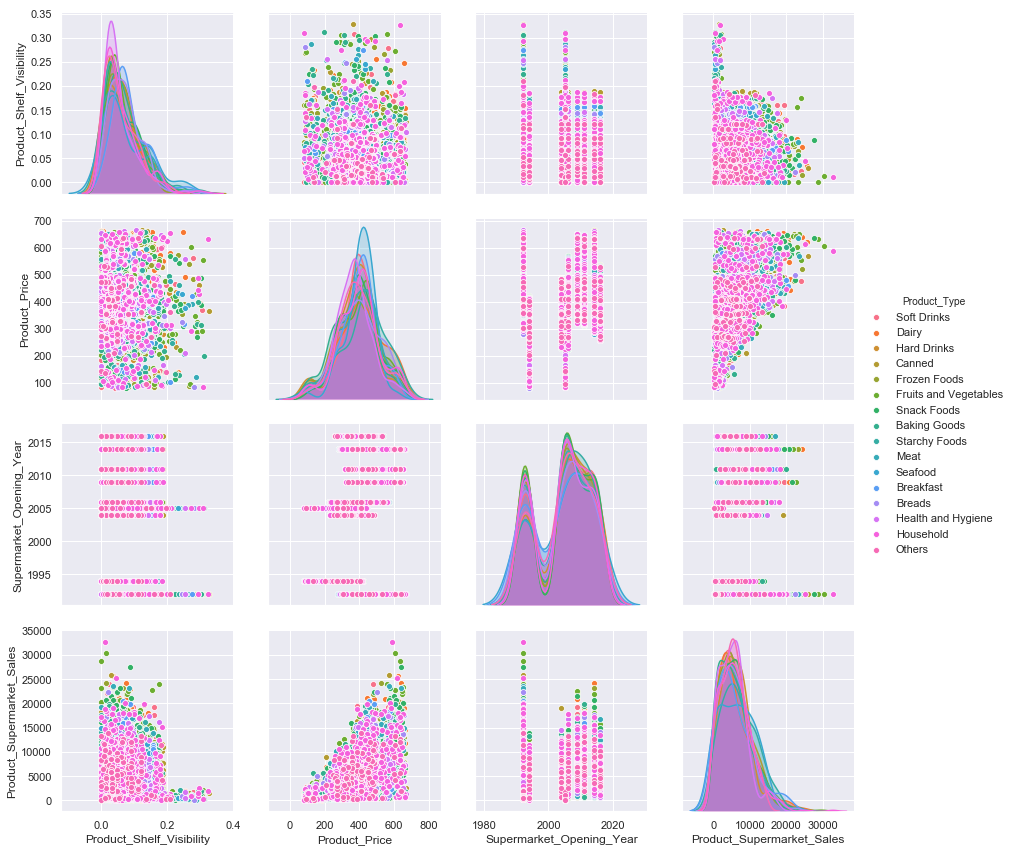

<Figure size 432x288 with 0 Axes>

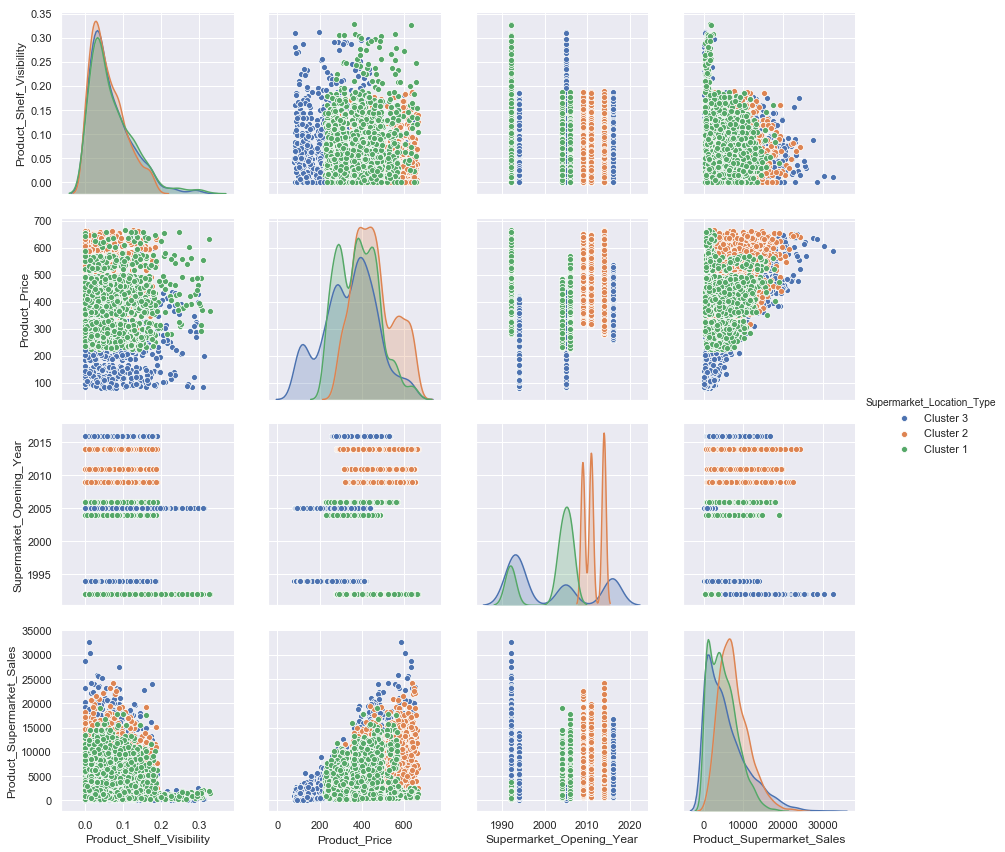

<Figure size 432x288 with 0 Axes>

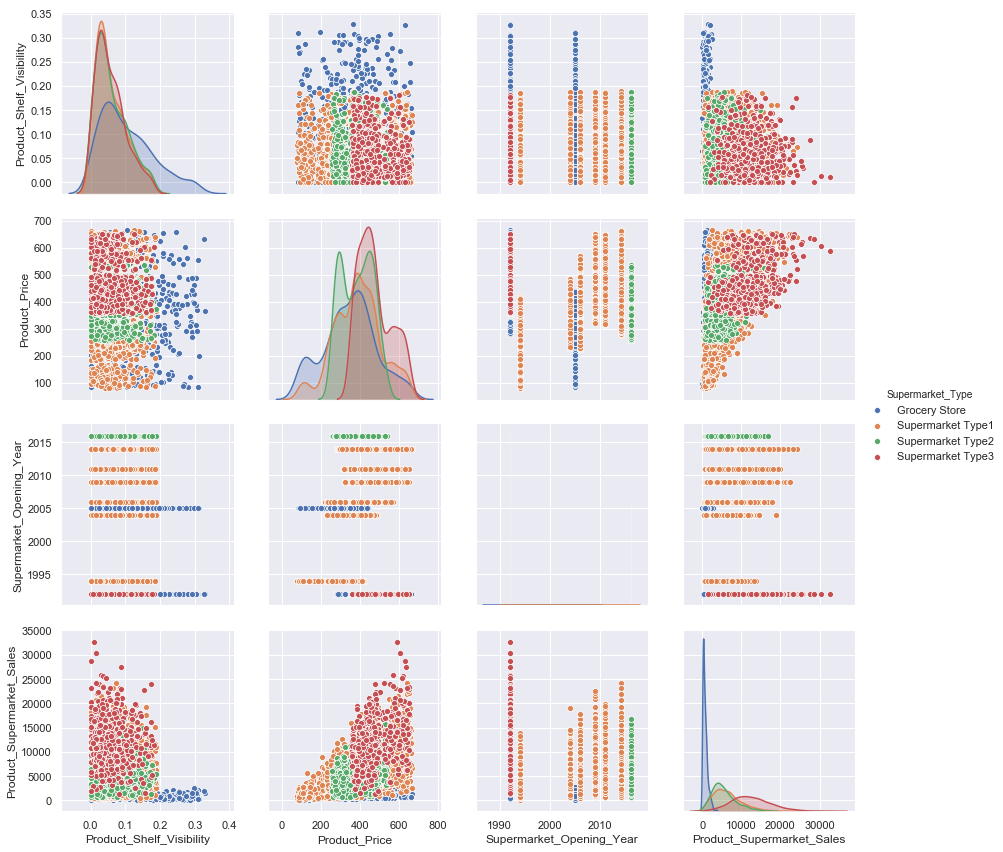

In [28]:
cat_cols_pair = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type', 'Supermarket_Type' ]

cols_2_pair = ['Product_Fat_Content',
             'Product_Shelf_Visibility',
             'Product_Type',
             'Product_Price',
             'Supermarket_Opening_Year',
             'Supermarket_Location_Type',
             'Supermarket_Type',
             'Product_Supermarket_Sales']

for col in cat_cols_pair:
    sns.set()
    plt.figure()
    sns.pairplot(newdata[cols_2_pair], height=3.0, hue=col)
    plt.show()

In [29]:
# plt.savefig("../SuperMarketPairPlot.png") 

## FEATURE ENGINEERING

### 1. New Feature Creation

When exploring our data, we proposed to create some new features. 

The first feature was a Boolean class to separate Normal Fat from the other classes. Let's do that below.

In [30]:
#print out all unique values
newdata['Product_Fat_Content'].unique()

array(['Low Fat', 'Ultra Low fat', 'Normal Fat'], dtype=object)

In [31]:
fat_content_dict = {'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1}
newdata['is_normal_fat'] = newdata['Product_Fat_Content'].map(fat_content_dict)
#Preview the values
newdata['is_normal_fat'].value_counts()

0    3217
1    1773
Name: is_normal_fat, dtype: int64

In [32]:
## Alternatively
#newdata['is_normal_FAT'] = newdata['Product_Fat_Content'].replace({'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1})

#newdata['is_normal_FAT'].value_counts()

Another feature we'll create is a column that captures the year of opening. This feature will separate Supermarket_Opening_Year into the 90s and 2000s.

In [33]:
#Assign year 2000 and above as 1, 1996 and below as 0

def cluster_open_year(year):
    if year <= 1996:
        return 0
    else:
        return 1
    
newdata['open_in_the_2000s'] = newdata['Supermarket_Opening_Year'].apply(cluster_open_year)

In [34]:
#Preview created feature
newdata[['Supermarket_Opening_Year', 'open_in_the_2000s']].head(4)

,Supermarket_Opening_Year,open_in_the_2000s
0,2005,1
1,1994,0
2,2014,1
3,2016,1


Another feature we will create is one that groups the  Product type into 2 classes. class 1 will hold Household, Health Hygiene and others categories while class 0 will hold the remaining categories.

In [35]:
#Get the unique categories in the column as a list
prod_type_cats = list(newdata['Product_Type'].unique())
#remove the class 1 categories
prod_type_cats.remove('Health and Hygiene')
prod_type_cats.remove('Household')
prod_type_cats.remove('Others')

def cluster_prod_type(product):
    if product in prod_type_cats:
        return 0
    else:
        return 1
    
newdata['Product_type_cluster'] = newdata['Product_Type'].apply(cluster_prod_type)

In [36]:
newdata[['Product_Type', 'Product_type_cluster']].tail(10)

,Product_Type,Product_type_cluster
4980,Health and Hygiene,1
4981,Health and Hygiene,1
4982,Health and Hygiene,1
4983,Household,1
4984,Household,1
4985,Household,1
4986,Household,1
4987,Household,1
4988,Household,1
4989,Household,1


### Transforming skewed features

During our EDA, we identified that Product_Supermarket_Sales and Product_Shelf_Visibility where right skewed, and we proposed to log transform them into a normal distribution.

Text(0.5, 1.0, 'Transformation of Product_Supermarket_Sales feature')

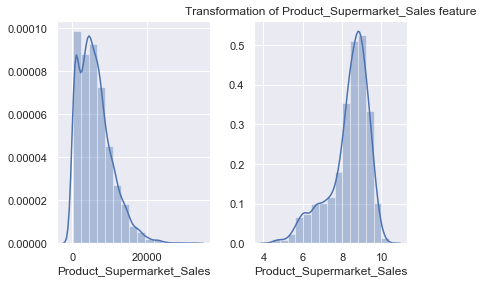

In [37]:
fig, ax = plt.subplots(1,2)
#plot of normal Product_Supermarket_Sales on the first axis
sns.distplot(newdata['Product_Supermarket_Sales'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Supermarket_Sales'] = np.log1p(newdata['Product_Supermarket_Sales'])
sns.distplot(newdata['Product_Supermarket_Sales'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Supermarket_Sales feature")

__Next, let's transform Product_Shelf_Visibility__

Text(0.5, 1.0, 'Transformation of Product_Shelf_Visibility feature')

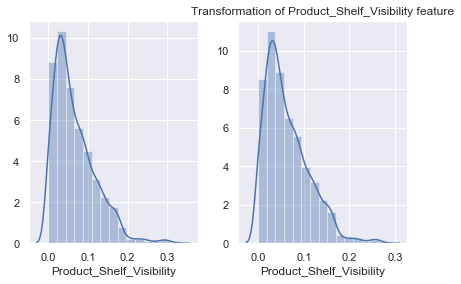

In [38]:
fig, ax = plt.subplots(1,2)
#plot of normal Product_Supermarket_Sales on the first axis
sns.distplot(newdata['Product_Shelf_Visibility'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Shelf_Visibility'] = np.log1p(newdata['Product_Shelf_Visibility'])
sns.distplot(newdata['Product_Shelf_Visibility'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Shelf_Visibility feature")

There's no significant change in this feature when we apply the Log transform. This is because the values are mostly close to zero. There exist advance ways we could use to transform features like this, but we'll stick with this in this post. Interested readers can find advanced methods here.

### HANDLING CATEGORICAL FEATURES

Next we''ll handle all categorical columns, but first I'll explain some important concepts that'll help us here.

__Categorical Encoding, what is it?__

Categorical variables are used to represent categories or classes. For instance the Product_Type column in our data set is a categorical variable with 3 classes (Low Fat, Ultra Low Fat and Normal Fat).

Categorical encodings are methods used to to turn non numerical features/variables to numbers. There are various ways to perform categorical encoding but it may depend on the type of categorical variable we're dealing with. 

The two categorical types we usually consider before doing encodings are ordinal and nonordinal/nominal categories. 

Understanding the difference between these two types is important before picking an encoding scheme. Let's understand them first.

__Ordinal Categoricals:__ These are categories that can be ordered in sequence of magnitude. i.e we can arrange the classes in such a way that one class can have a greater magnitude than the other. 
For instance the feature SuperMarket_Size in our dataset is an ordinal categorical because the class label High is greater than Medium which in turn is greater than Small. So if we encode these features, we should definitely assign a greater class number to the High class.

__{High : 3, Medium: 2, Small: 1}__

__Nonordinal Categoricals__ These categories have no meaningful difference in magnitude. i.e one class label is not greater than the other. For Instance, in the feature Product_Type, Soft drink is not greater than Household, nor is the Health and Hygiene class greater than the Diary class.

##### NOW LET'S TALK ABOUT SOME TYPES OF ENCODING
Encoding for categorical features with small number of classes, typically less than 15

__One-Hot Encoding:__ In one hot encoding, we use a group of bits to represent a class, where only one class can be activated at a specific time. Consider the feature Supermarket_Location_Type in our data set, this feature has three classes (cluster 1, cluster 2 and cluster 3). We can one-hot encode this feature using three bits as shown below.

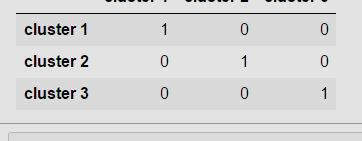

Here, we can see that we used 3 bits where one and only one class can be activated at a time. 



__Dummy Encoding:__ Dummy encoding is the same as One-Hot Encoding, the only difference is that in dummy encoding, we use one less bit than One-Hot encoding. I.e, we have a class with all zero bit. The difference is subtle and both methods can be used interchangeably.

__Encoding for categorical features with large number of classes, typically greater than 15__

__Label Encoding:__ In Label Encoding, we simply assign integers, say 1 to n (n = number of classes) to each category. This usually result in an order-able feature.

__Note:__ Some Machine Learning models like Tree or Linear Models can perform well with this type of encoding because trees do not work with magnitudes of data points. But this would affect Neural Nets and Distance based models like KNN which take into consideration the magnitude of data points.

Other Advance but effective encoding schemes are Embeddings, Feature Hashing and Bin Counting.

#### ENCODING OF FEATURES

In [39]:
for col in cat_cols:
    print('Value Count for', col)
    print(newdata[col].value_counts())
    print("---------------------------")

Value Count for Product_Fat_Content
Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64
---------------------------
Value Count for Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
---------------------------
Value Count for Supermarket _Size
Medium    1582
Small     1364
High       594
Name: Supermarket _Size, dtype: int64
---------------------------
Value Count for Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dt

Now, looking at our features, the column with the highest number of classes is the Product_Type column (15). In this case we can use the one-hot-encoding scheme since our data is small (approx 5000) and the unique categories are also small.

Use the pandas get_dummies function when working smaller categories__

In [40]:
#save the target value to a new variable
y_target = newdata['Product_Supermarket_Sales']
newdata.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

#one hot encode using pandas dummy function
dummified_data = pd.get_dummies(newdata)
dummified_data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,is_normal_fat,open_in_the_2000s,Product_type_cluster,Product_Fat_Content_Low Fat,Product_Fat_Content_Normal Fat,Product_Fat_Content_Ultra Low fat,...,Supermarket _Size_High,Supermarket _Size_Medium,Supermarket _Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,11.6,0.066289,357.54,2005,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,11.6,0.040097,355.79,1994,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,11.6,0.040352,350.79,2014,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,11.6,0.040290,355.04,2016,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


### NOTE
<a style="color: steelblue">

`y_target` our target variable of ***Sales*** is of continuous value, this indicates that it requires a Regression Model' Approach 
</a>

In [41]:
# from sklearn.preprocessing import LabelEncoder

In [42]:
# for cat in cat_cols:
#     lb = LabelEncoder()
#     lb.fit(list(newdata[cat].values))
#     newdata[cat] = lb.transform(list(newdata[cat].values))

## Fill in Missing Values

Print out columns with missing values

In [43]:
dummified_data.shape

(4990, 36)

In [44]:
#Print null columns
dummified_data.isnull().sum()

Product_Weight                         802
Product_Shelf_Visibility                 0
Product_Price                            0
Supermarket_Opening_Year                 0
is_normal_fat                            0
open_in_the_2000s                        0
Product_type_cluster                     0
Product_Fat_Content_Low Fat              0
Product_Fat_Content_Normal Fat           0
Product_Fat_Content_Ultra Low fat        0
Product_Type_Baking Goods                0
Product_Type_Breads                      0
Product_Type_Breakfast                   0
Product_Type_Canned                      0
Product_Type_Dairy                       0
Product_Type_Frozen Foods                0
Product_Type_Fruits and Vegetables       0
Product_Type_Hard Drinks                 0
Product_Type_Health and Hygiene          0
Product_Type_Household                   0
Product_Type_Meat                        0
Product_Type_Others                      0
Product_Type_Seafood                     0
Product_Typ

In [45]:
# Compute the mean
mean_pw = dummified_data['Product_Weight'].mean()
#Fill the missing values with calculated mean
dummified_data['Product_Weight'].fillna(mean_pw, inplace=True)

In [46]:
#Check if filling is successful
dummified_data.isnull().sum()

Product_Weight                         0
Product_Shelf_Visibility               0
Product_Price                          0
Supermarket_Opening_Year               0
is_normal_fat                          0
open_in_the_2000s                      0
Product_type_cluster                   0
Product_Fat_Content_Low Fat            0
Product_Fat_Content_Normal Fat         0
Product_Fat_Content_Ultra Low fat      0
Product_Type_Baking Goods              0
Product_Type_Breads                    0
Product_Type_Breakfast                 0
Product_Type_Canned                    0
Product_Type_Dairy                     0
Product_Type_Frozen Foods              0
Product_Type_Fruits and Vegetables     0
Product_Type_Hard Drinks               0
Product_Type_Health and Hygiene        0
Product_Type_Household                 0
Product_Type_Meat                      0
Product_Type_Others                    0
Product_Type_Seafood                   0
Product_Type_Snack Foods               0
Product_Type_Sof

In [47]:
dummified_data_copy = dummified_data

### SPLIT OUR DATA INTO TRAIN AND TEST SETS

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummified_data, y_target, test_size = 0.3)

print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (3493, 36)
Training target is (3493,)
test data is (1497, 36)
test target is (1497,)


## PERFORM FEATURE NORMALIZATION/ SCALING

In [49]:
from sklearn.preprocessing import RobustScaler, StandardScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data

array([[-0.08636005,  0.74086618,  0.28954577,  0.        ,  1.        ],
       [-1.17714019,  0.97293676,  0.22902465,  0.47058824,  0.        ],
       [-0.15728204,  1.5994992 , -0.65897942, -0.70588235,  1.        ],
       [ 0.6512286 ,  0.62401616,  0.23590495,  0.17647059,  0.        ],
       [ 1.09094492, -0.12057665,  0.31974263,  0.17647059,  1.        ]])

<aside style="color: steelblue">
It will be helpful to know that by scaling, we normalize distant values in the dataset.

For example before we fit the dataset, 
- values in the `Product_Weight` column were ~12
- values in the `PSVisibility` column < 0.1
- values in the `Product_Price` column >300
and so on..

Hence, feature scaling, which will reduce reduce the variability with each column, contained in a box of fixed size, as we can see in the result above.
</aside> 

### MODELLING

Now that we have successfully done the hard part-data cleaning and wrangling-of every data science project, we will move on the fun part modelling! Well its fun and quite straightforward. 

Modelling in machine learning is an iterative phase where a data scientist continually train and test machine learning models to discover the best and high performing one for the give task. 

Different machine learning models exist and the choice of which one to use generally boils depends on the problem at hand. No machine learning model works best for all kind of problems. So, your job in this stage is test multiple models, fine tune parameters to squeeze out higher accuracies or lower error depending on the task.

Note: While we generally strive for higher performing models, it is generally wiser and better to go for simpler models that perform almost as well as complex models. 

Save the .0001 increase in performance for your machine learning competitions because most of the time in the real world those minute difference doesn not really matter.

With that in mind, let's do some modelling. We'll start with a simple model. It is always good to start with a simple base model because you need a base line to measure performance against.

Sinve our data set is small, we'll create a cross validation function and use the mean absolute error metric. This function helps measure our models true performance. More on why you should use cross validation here.

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


# def get_mae(pred, target):
#     return mean_absolute_error(true, pred)

def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='neg_mean_absolute_error'))
    return np.mean(score)




### START WITH A LINEAR REGRESSION

We start our modelling with a simple linear regression, cross validate and print its score.

#### What can we tune

Linear regression is simple and as such does not have much parameter to tune. So we simply use the out-of-box parameters.

In [51]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()
print("MAE Sccore: ", cross_validate(lr_model, 10, X_train, y_train))

MAE Sccore:  0.4132541927184684


In [52]:
## Creating a DataFrame to later compare our Model' Results
results = pd.DataFrame([['LinearRegression', cross_validate(lr_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])
model_results = results

### USING A DECISION TREE

Next, we use another simple but efficient algorithm called decision tree

#### What can we tune
The decision tree contains many hyperparameter, but the most important ones we can quickly tune are:

1. __max_depth__: 

2. __min_samples_leaf__: 


In [53]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=2)
print("MAE Sccore: ", cross_validate(dt_model, 10, X_train, y_train))

MAE Sccore:  0.4239650417489088


In [54]:
results = pd.DataFrame([['DecisionTreeRegressor', cross_validate(dt_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)

### USING K-NEAREST NEIGHBOR

Next, we try a popular distance based algorithm called k-nearest neigbor

#### What can we tune
The KNN contains a few hyperparameter. The most important one to tune is:

1. __n_neighbors__: This is the number of neighbors to use when voting. The higher the number, the more accurate it gets (sometimes though) but at an expense of speed.



In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=60) #', random_state=2'? KNeighborsRegressor has no such hyper-parameter.
print("MAE Sccore: ", cross_validate(knn_model, 10, X_train, y_train))

MAE Sccore:  0.4268620455098115


In [57]:
results = pd.DataFrame([['KNeighborsRegressor', cross_validate(knn_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)

Looking at the MAE(mean absolute error) score of our simple models, we can see that the decision tree is the best so far. This will be our base line model. Any model that performs better becomes the next base line to beat.

Now, we'll move from simple to advanced models. Many high performing machine learning models-both in data science competitions and real world-are usually based on ensembles. Ensembling is a method that uses multiple learning algorithms to obtain better predictive performance than could be obtained by any of the single learning algorithm.

I wrote in detail about ensemble techniques here

We'll use some popular ensemble method below and compare their performance.


## BAGGING ALGORITHMS


### RANDOMFOREST
The Random forest algorithm is a popular and effective implementation of bagging, that builds multiple trees from a bootstrap sample. It has high predictive power and works very well out of box.

#### What can we tune
Random Forest contains may hyperparameter, but the most important ones to tune are:

1. n_estimators: This is the number of decision trees to be created. As we might guess, a higher number of trees will result in a better model but at a cost of higher training time.
2. max_depths: This is the maximum depth of the individual trees. Higher number result in simpler trees and hence simpler random forest ensemble. 
3. max_features: This defines the maximum number of features that is allowed for splitting.
4. min_samples_split: This is the minimum number of samples required in a leaf node before a splitting.

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=2)
print("MAE Sccore: ", cross_validate(rf_model, 10, X_train, y_train))

MAE Sccore:  0.4072718037456616


In [59]:
results = pd.DataFrame([['RandomForestRegressor', cross_validate(rf_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)

### EXTRA TREES

The Extra Tree algorithm is another popular implementation of bagging, it is similar to the random forest, but builds its base trees differently and is generally faster. It also has high predictive power sometimes outperforming Random Forest.

#### What can we tune
Extra Trees contains similar hyperparameter to Random Forest. Important parameters to tune are:

1. n_estimators: This is the number of decision trees to be created. As we might guess, a higher number of trees will result in a better model but at a cost of higher training time.
2. max_depths: This is the maximum depth of the individual trees. Higher number result in simpler trees and hence simpler random forest ensemble.
3. max_features: This defines the maximum number of features that is allowed for splitting.
4. min_samples_split: This is the minimum number of samples required in a leaf node before a splitting.

In [60]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor(n_estimators=100, max_depth=5, random_state=2)
print("MAE Sccore: ", cross_validate(et_model, 10, X_train, y_train))

MAE Sccore:  0.4069746484233535


In [61]:
results = pd.DataFrame([['ExtraTreeRegressor', cross_validate(et_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)

### BAGGING REGRESSOR

The Bagging regressor allows you to create bagging ensembles from any chosen model. I.e you can create bagging ensembles from single models like Linear regression or even ensembles like Random Forest or Extra Trees.

#### What can we tune
The important hyperparameter to tune here are:

1. base_estimator: This is the estimator to use in performing bagging. The bagging meta-estimator builds multiple models from the specified base estimator. 
2. n_estimators: This is the number of base estimator to be created. A higher number of estimators will result in a better model but also at a cost of higher training time.
3. max_samples: This specifies the maximum number of samples to train each base estimator on.
4. max_features: This is the maximum number of features to draw from the data set when training each base estimator

In [62]:
from sklearn.ensemble import BaggingRegressor

bgg_model = BaggingRegressor(et_model, n_estimators=20, random_state=2)
print("MAE Sccore: ", cross_validate(bgg_model, 10, X_train, y_train))

MAE Sccore:  0.40710231927695906


In [63]:
results = pd.DataFrame([['BaggingRegressor', cross_validate(bgg_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)

From the error metrics, our next best model is the bagging regressor, which is based on the Extra Tree Regressor. This becomes our new baseline model.

Next, let's try some boosting algorithms.

### BOOSTING ALGORITHMS

Boosting is another popular and effective ensembling technique. In Boosting, multiple models are trained sequentially. The goal is to train models that do better than their predecessors. This means we have to take into account the areas where the previous models performed poorly and improve on those area. More on boosting here.


#### ADABOOST

We start with the vanilla implementation of boosting called the AdaBoost. This is an old and well known boosting technique that performs well on regression task, although its is known to overfit alot.

#### What can we tune
The important hyperparameter to tune here are:

1. n_estimators: This is the number of base estimators to use. A higher value normally gives better performance.
2. learning_rate:This parameter controls the training weight update. It is usually tuned together with the n_estimators. A popular rule of thumb is that "When you increase the n_estimator by a factor of 10, you decrease the learning rate by a factor of 10 too.
3. base_estimator:This specifies the base model to boost.
4. max_depth: This specifies the depth of the base estimators.

In [64]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(et_model, n_estimators=150, random_state=2)
print("MAE Sccore: ", cross_validate(ada_model, 10, X_train, y_train))

MAE Sccore:  0.4238217069891115


In [65]:
results = pd.DataFrame([['AdaBoostRegressor', cross_validate(ada_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)


#### GRADIENT BOOSTING

Another popular boosting algorithm is the Gradient Boosting. 

#### What can we tune
The important hyperparameter to tune here are:

1. n_estimators: This is the number of base estimators to use. A higher value normally gives better performance.
2. max_depth: This specifies the depth of the base estimators.
3. min_samples_splits: This specifies the minimum number of samples required to split an internal node.

4. max_features: The maximum number of features to draw from the data set when training each base estimator

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=150, max_depth=3, max_features='sqrt', min_samples_split=4, random_state=2)
print("MAE Sccore: ", cross_validate(gb_model, 10, X_train, y_train))

MAE Sccore:  0.40887582765675407


In [67]:
results = pd.DataFrame([['GradientBoostingRegressor', cross_validate(gb_model, 10, X_train, y_train)]],
                               columns = ['Model', 'Mean Absolute Error'])

model_results = model_results.append(results, ignore_index=True)


#### XGBOOST

"When in doubt use XGBoost" has been one of the most popular quotes from the kaggle platform in recent years. 

XGBoost is efficient, fast and works well out of the box.

#### What can we tune
The important hyperparameter to tune here are:

1. eta: Just a different name for learning rate. It helps in model weight update.
2. min_child_weight: This specifies the minimum sum of weights of all features required in a child node. It is mostly used to control overfitting.
3. max_depth: This is used to define the maximum depth of each tree node. Higher depth will allow the model to be more complex and vice versa.
4. max_leaf_nodes: This specifies the maximum number of leaves in a tree.
5. Gamma: The Gamma value specifies the minimum loss reduction required to make a split. A node is split only when the resulting split gives a positive reduction in the loss function. The values can vary depending on the loss function and should be tuned.
6. Subsample: Specifies the fraction of features to be randomly selected for each tree. Lower values make the algorithm more simple and prevent overfitting.


#### LIGHTGBM

LightGBM is a boosting algorithm from Microsoft. It is one of the fastest boosting algorithm out there; efficient out-of-the-box and currently the go-to when it comes to large structured data.

#### What can we tune
The important hyperparameter to tune here are:

1. num_iterations: This specifies the number of boosting iterations to be performed.
2. num_leaves : Specifies the number of leaves to be formed in a tree. Note: In Light GBM, since splitting takes place leaf-wise rather than depth-wise, num_leaves must be smaller than 2^(max_depth), otherwise, it may lead to overfitting.
3. min_data_in_leaf : It is one of the most important parameters in dealing with overfitting. 
4. max_depth: Specifies the maximum depth to which a tree can grow. A very high value for this parameter can cause overfitting.
5. bagging_fraction: It is used to specify the fraction of data to be used for each iteration. This parameter is generally used to speed up the training.


#### CATBOOST

Catboost is a recent boosting algorithm. It is fast, efficient and handles categorical features easily (One of its best feature).
CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms


#### What can we tune
The important hyperparameter to tune here are:

1. loss_function: Specifies the metric to be used for training.
2. Iterations: The maximum number of trees that can be built.
3. learning_rate: Specifies the learning rate which is used for reducing the gradient step.
4. depth: Specifies the depth of the trees to be created.

In [68]:
## Comparing Model Accuracy using the Mean Absolute Errors
model_results = model_results.sort_values(ascending = False, by = 'Mean Absolute Error').reset_index().drop(columns='index')

model_results

,Model,Mean Absolute Error
0,KNeighborsRegressor,0.426862
1,DecisionTreeRegressor,0.423965
2,AdaBoostRegressor,0.423822
3,LinearRegression,0.413254
4,GradientBoostingRegressor,0.408876
5,RandomForestRegressor,0.407272
6,BaggingRegressor,0.407102
7,ExtraTreeRegressor,0.406975


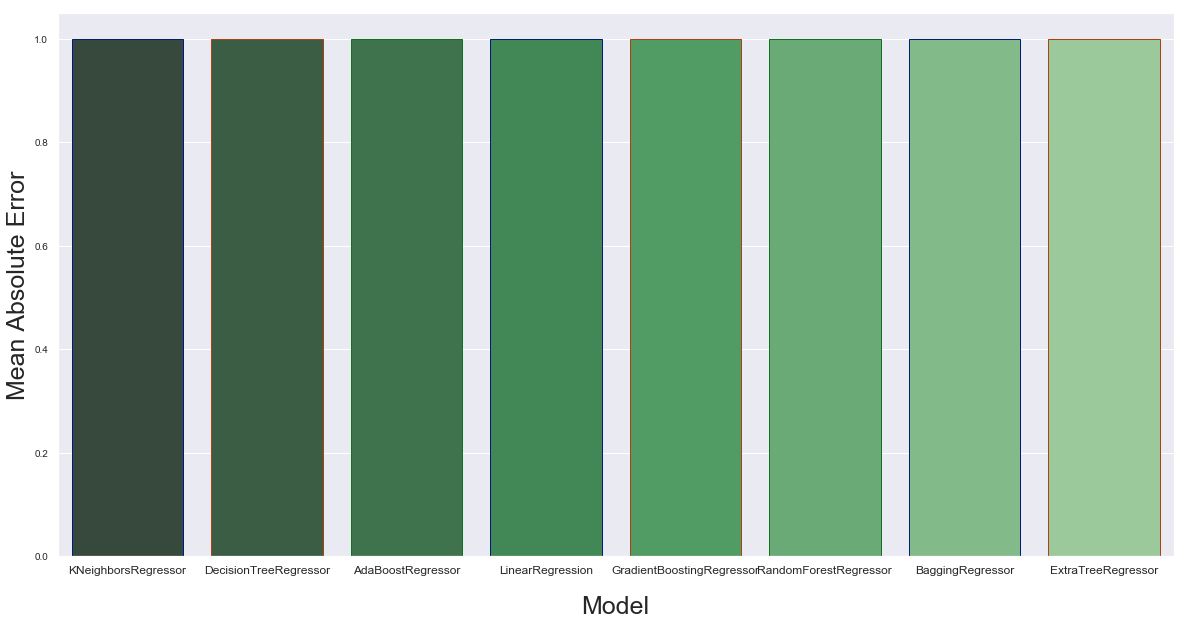

In [70]:
## Visualizing the Results
plt.figure(figsize = (20, 10))
sns.countplot(x = "Model", data = model_results, palette = "Greens_d", edgecolor = sns.color_palette("dark", 3))

plt.xticks(size = 12)
plt.yticks(size = 10)

plt.xlabel('Model',size = 25, labelpad = 20)
plt.ylabel('Mean Absolute Error',size = 25)

plt.show()